# Ford-GoBike-System_data
## by Ramya Ramachandra

## Investigation Overview

1. The investigation is to analyze a dataset containing information about bike trips, in a focus on variables such as trip duration, user type, age, gender, and station information.

2. Its main objective is to identify patterns and relationships in the data for the purpose to get insights that may influence trip duration and user behavior.


## Dataset Overview

1. The dataset used for analysis about bike trips includes details such as trip duration, user type. age, gender, and station information. 

2. The dataset provides an in-depth analysis of bike usage patterns, which will be analyzed in order to gain insights into user behavior and factors influencing trip duration.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


import warnings
warnings.simplefilter("ignore")

In [2]:
trip_data=pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#convert the datatype 
trip_data['start_time'] = pd.to_datetime(trip_data['start_time'])
trip_data['end_time'] = pd.to_datetime(trip_data['start_time'])

trip_data['start_station_id'] = trip_data['start_station_id'].astype(str)
trip_data['end_station_id'] = trip_data['end_station_id'].astype(str)

### What is the main features of interest in your dataset?
* To provide insights into the average trip length, identify outliers and help understand the usage patterns of the bike-sharing system.
* Use start_time and end_time for analyzing patterns based on time of day, day of the week, or month of the year, and understand the peak usage periods.
* Identify frequently used routes, users, age distribution, and gender breakdown.

In [4]:
#copy original dataframe to df
df=trip_data.copy()

### Distribution of User Age

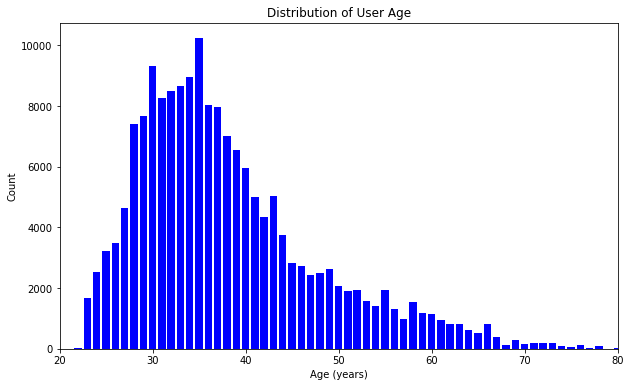

In [5]:
##### Distribuation of User Age

plt.figure(figsize=[10, 6])
age = (2023 - df['member_birth_year']).value_counts().sort_index()
plt.bar(age.index, age.values, color='blue')
plt.title('Distribution of User Age')
plt.xlabel('Age (years)')
plt.xlim([20, 80])
plt.ylabel('Count')
plt.show()

### Distribution of  Gender Breakdown

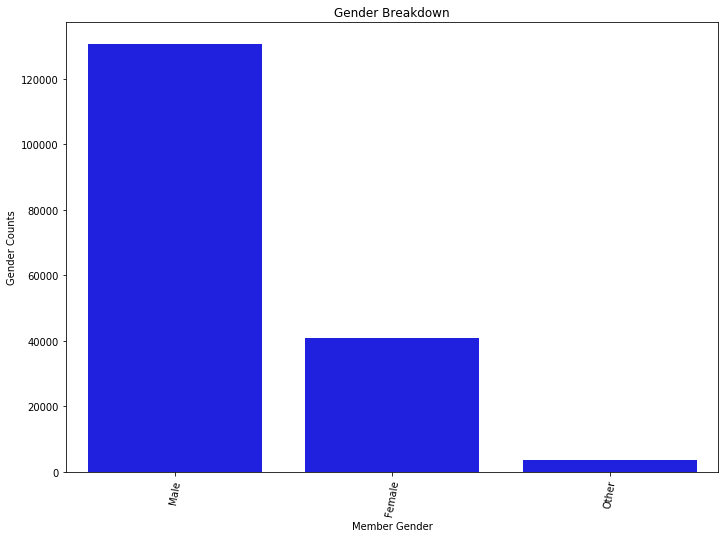

In [6]:
#Distribution of Gender Counts

gender_counts = df['member_gender'].value_counts()
plt.figure(figsize=[ 11.69, 8.27])
sns.barplot(x=gender_counts.index, y=gender_counts.values, color='blue')
plt.title("Gender Breakdown")
plt.xlabel('Member Gender')
plt.ylabel('Gender Counts')
plt.xticks(rotation=80)
plt.show();


### Distribution of Trip duration by Age

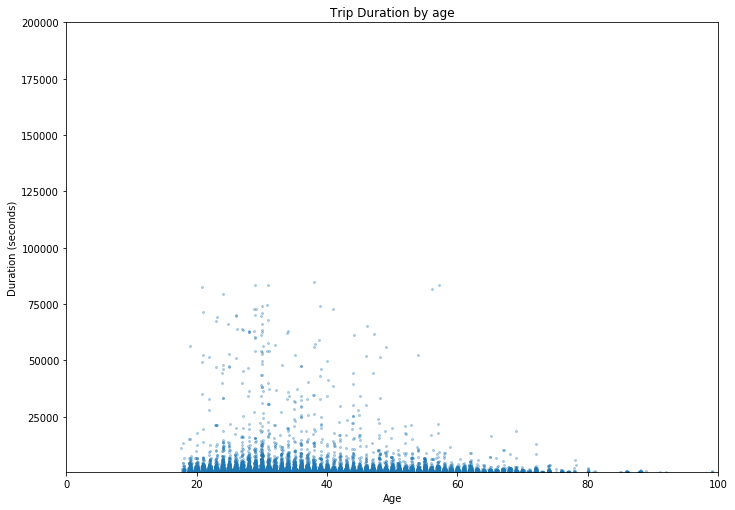

In [7]:
#Trip Duration and Age by gender.

df['trip_duration']=df['duration_sec']
def plot_data(df, x_col, y_col, title, xlabel, ylabel, figure_size=(11.69, 8.27), axis_range=None, xlim=None, jitter_amount=0.1, alpha=0.3):
    plt.figure(figsize=figure_size)
    
    # Add jitter to the x and y values
    x_jitter = df[x_col] + np.random.normal(0, jitter_amount, len(df))
    y_jitter = df[y_col] + np.random.normal(0, jitter_amount, len(df))
    
    plt.scatter(x_jitter, y_jitter, alpha=alpha, s=4)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if axis_range:
        plt.axis(axis_range)
    if xlim:
        plt.xlim(xlim)
    plt.show()
    
df['age'] = 2019 - df['member_birth_year']

plot_data(df, 
           'age', 
           'trip_duration',
            'Trip Duration by age',
             'Age',
            'Duration (seconds)',
            axis_range=[-10, 150, 500, 200000],
            xlim=[0, 100],
            jitter_amount=0.1,
            alpha=0.3)


##### Dependency of gender and trip duration

In [8]:
df['day_ofweek'] = df['start_time'].dt.day_name()
trips = df['day_ofweek'].value_counts().sort_index()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips

Friday       28981
Monday       26852
Saturday     15405
Sunday       15523
Thursday     35197
Tuesday      31813
Wednesday    29641
Name: day_ofweek, dtype: int64

#### Distribution of Trip Duration and Age by Gender


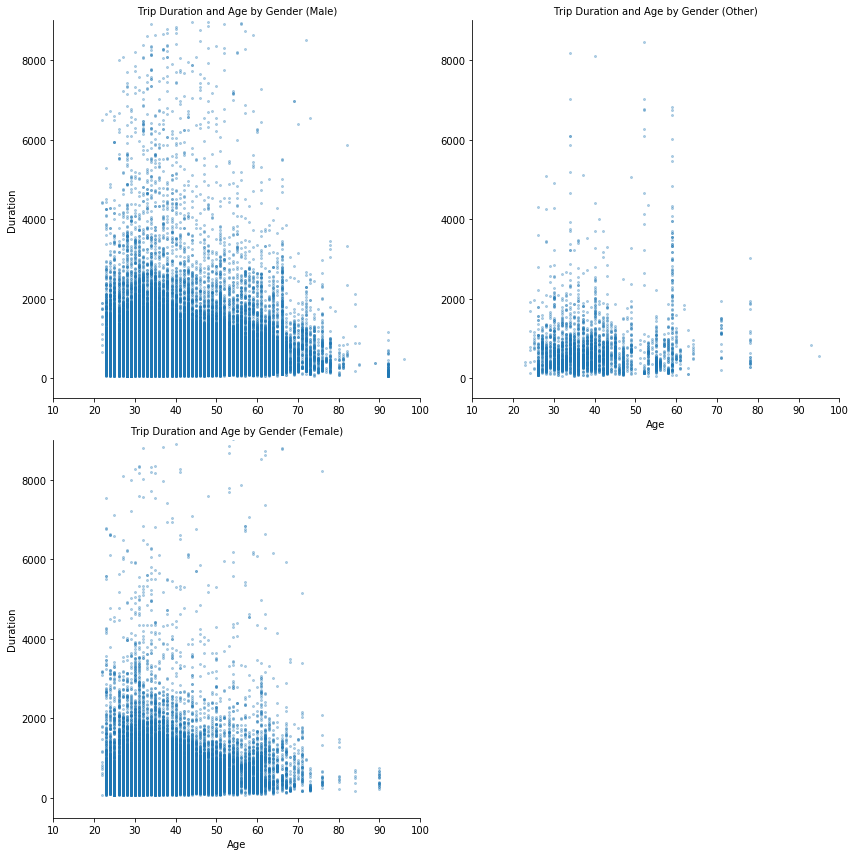

In [9]:
df['age'] = 2023 - df['member_birth_year']

g=sns.FacetGrid(data=df, col='member_gender', col_wrap=2, size=6, xlim=[10, 100], ylim=[-500, 9000], despine=True,
                       sharex=False, sharey=False) # https://seaborn.pydata.org/generated/seaborn.despine.html
g.map(plt.scatter, 'age', 'trip_duration', alpha=0.3, s=4)
g.set_xlabels('Age')
g.set_ylabels('Duration')
g.set_titles('Trip Duration and Age by Gender ({col_name})')

plt.show()

#### Distribution of Trip Duration and User Type by gender

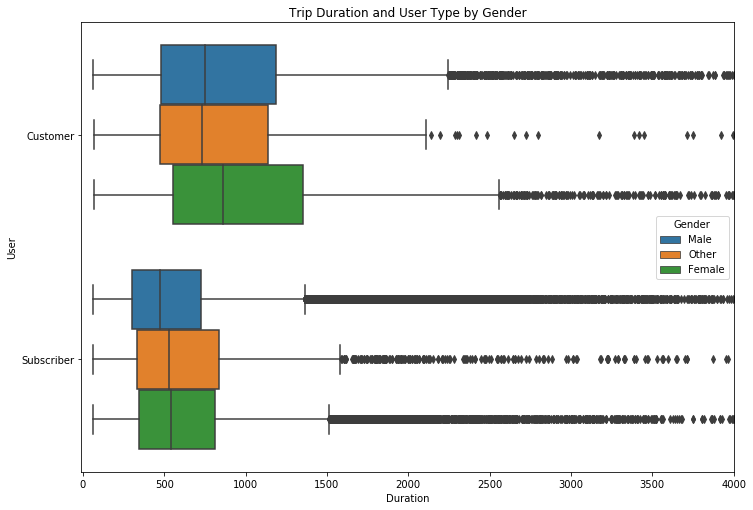

In [10]:
#Trip Duration and User Type by gender.

plt.figure(figsize=[ 11.69, 8.27])
sns.boxplot(x="trip_duration", y="user_type", data=df, hue="member_gender")
plt.xlabel('Duration')
plt.ylabel('User')
plt.title('Trip Duration and User Type by Gender')
plt.legend(title='Gender')
plt.xlim([-10, 4000])
plt.show()

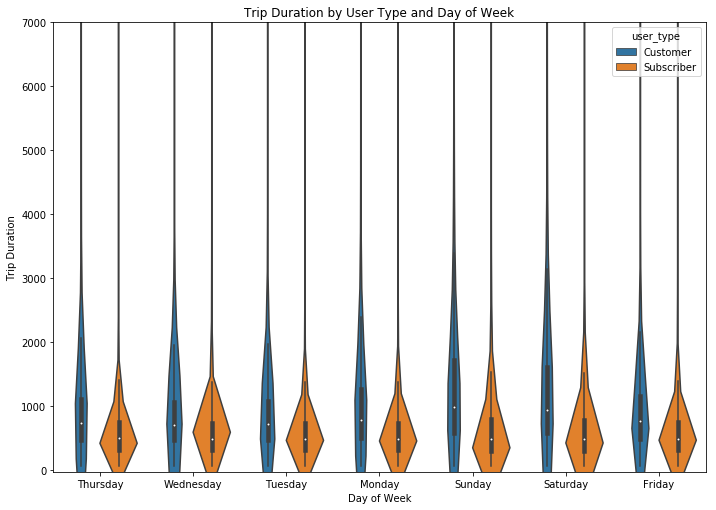

In [11]:
#Trip duration using User Type and Day of Week

plt.figure(figsize=[ 11.69, 8.27])
sns.violinplot(x="day_ofweek", y="trip_duration", hue="user_type",  data=df)
plt.xlabel("Day of Week")
plt.ylabel("Trip Duration")
plt.title("Trip Duration by User Type and Day of Week")
plt.ylim([-25, 7000])
plt.show()

#### Observation 1:
* The most popular start-stations is Market St at 10th St, San Francisco Caltrain Station 2 and Berry St at 4th St, these stations have significantly higher trip counts compared to others.
* The popular end-station is San Francisco Caltrain Station 2, Market St at 10th St. These align with the popular start-stations.
* The majority of bike users are male with 76% of the total, and female around 24%.

### Were there any interesting or surprising interactions between features?

> The countplot of bike users per day showed that the distributions of Subscribers and Customers varied across different days of the week. Subscribers were more prevalent on weekdays,and Customer had higher counts on weekends. 

>There were differences based on gender when analyzing the relationship between trip duration, age, and gender in box plot analyses where there was no clear correlation between trip duration and age. The box plot revealed that the upper quartile of trip time was somewhat greater for females than males, showing a gender-related interaction with trip duration.

### Conclusions
* The analysis indicates that the trip duration follows a right-skewed distribution , indicating that most trips are relatively for shorter duration. There are also significant number of longer duration trips
* The majority of users in the dataset are subscribers, indicating that there is strong base of loyal users. Customer represent a smaller portion.
* There is clear relationship between age and trip duration, the analysis showed that users in their late 20s to late 30s tend to have the highest trip counts and longer trip durations.


In [12]:
#Export cleaned Dataframe to CSV file for Slide deck.
df.to_csv('data_cleaned.csv', index=False)
df_clean = pd.read_csv('data_cleaned.csv')

In [13]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_duration,age,day_ofweek
0,52185,2019-02-28 17:32:10.145,2019-02-28 17:32:10.145,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,52185,39.0,Thursday
1,42521,2019-02-28 18:53:21.789,2019-02-28 18:53:21.789,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,42521,NaN,Thursday
2,61854,2019-02-28 12:13:13.218,2019-02-28 12:13:13.218,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,61854,51.0,Thursday
3,36490,2019-02-28 17:54:26.010,2019-02-28 17:54:26.010,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,36490,34.0,Thursday
4,1585,2019-02-28 23:54:18.549,2019-02-28 23:54:18.549,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,1585,49.0,Thursday


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [14]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 282145 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/opt/conda/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.6/site-packages/jupyter_core/application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 507, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/opt/conda/lib/python3.6/s

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
